## Import package yang diperlukan

In [1]:
#analysis
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

## Data

Dataset yang digunakan adalah data <font color=red>_wine_</font> yang ada di __UCI Machine Learning Repository__.

- Data ini merupakan hasil analisis kimia dari 3 jenis anggur (wine) yang tumbuh di Italia.
- Memiliki 1 label yaitu Wine class (jenis anggur) yang dibagi menjadi 3 kelas (1, 2, 3).
- Dan 13 fitur yaitu:
  1. Alcohol   
  2. Malic acid 
  3. Ash 
  4. Alcalinity of ash 
  5. Magnesium 
  6. Total phenols 
  7. Flavanoids 
  8. Nonflavanoid phenols 
  9. Proanthocyanins 
  10. Color intensity 
  11. Hue 
  12. OD280/OD315 of diluted wines 
  13. Proline 

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
                 names=['Wine class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
                        'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 
                        'Proline '])
df.head()

,Wine class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Kemudian, kolom 'Wine class' dapat diubah menjadi 'Class' agar lebih sederhana.

In [3]:
df.rename(columns={'Wine class' : 'Class'}, inplace=True)

In [4]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Misal, kita ingin mengetahui berapa jumlah tiap jenis Wine.

In [5]:
print('Frekuensi Jenis Anggur')
print('Kelas 1: %s%%' %np.round(df['Class'][df['Class'] == 1].count() / len (df) * 100, decimals=2))
print('Kelas 2: %s%%' %np.round(df['Class'][df['Class'] == 2].count() / len (df) * 100, decimals=2))
print('Kelas 3: %s%%' %np.round(df['Class'][df['Class'] == 3].count() / len (df) * 100, decimals=2))

Frekuensi Jenis Anggur
Kelas 1: 33.15%
Kelas 2: 39.89%
Kelas 3: 26.97%


In [6]:
df['Class'].value_counts().sort_values(ascending=True)

3    48
1    59
2    71
Name: Class, dtype: int64

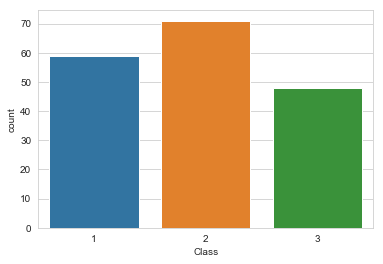

In [7]:
sns.countplot(x='Class', data=df)

Membagi data menjadi fitur X dan kelas y

In [8]:
X = df.iloc[:,1:].values
y = df.iloc[:,:1].values

In [9]:
X.shape, y.shape

((178, 13), (178, 1))

Menstardardisasi data

In [10]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [11]:
X_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [22]:
X_std.shape[0]

178

Menghitung matrix covarians

In [13]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (((X_std - mean_vec).T).dot(X_std - mean_vec)) / (X_std.shape[0]-1)
print('Matriks covarians \n%s' %cov_mat)

Matriks covarians 
[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 [ 0

Menghitung eigen value dan eigen vector

In [14]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigen vectors \n%s' %eig_vecs)
print('\nEigen values \n%s' %eig_vals)

Eigen vectors 
[[-0.1443294   0.48365155 -0.20738262  0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093  0.08901289 -0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881  0.6262239   0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905   0.61208035 -0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634    0.13075693  0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.39466085  0.06503951  0.14617896 -0.19806835 -0.14931841 -0.0841223
   0.02792498  0.46390791 -0.40593409 -0.30388245 -0.28603452  0.30434119
  -0.32013135]
 [-0.422

In [15]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigen values dari yang terbesar:')
for i in eig_pairs:
    print(i[0])

Eigen values dari yang terbesar:
4.732436977583593
2.5110809296451224
1.454241867846469
0.9241658668248741
0.8580486765371109
0.6452822124678539
0.5541414662457841
0.10396199182075298
0.3504662749462547
0.16972373898012144
0.29051203269397685
0.22706428173088525
0.2523200103608253


In [16]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(13,1), 
                      eig_pairs[1][1].reshape(13,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.1443294   0.48365155]
 [ 0.24518758  0.22493093]
 [ 0.00205106  0.31606881]
 [ 0.23932041 -0.0105905 ]
 [-0.14199204  0.299634  ]
 [-0.39466085  0.06503951]
 [-0.4229343  -0.00335981]
 [ 0.2985331   0.02877949]
 [-0.31342949  0.03930172]
 [ 0.0886167   0.52999567]
 [-0.29671456 -0.27923515]
 [-0.37616741 -0.16449619]
 [-0.28675223  0.36490283]]


In [17]:
X_new = X_std.dot(matrix_w)

In [18]:
X_new

array([[-3.31675081,  1.44346263],
       [-2.20946492, -0.33339289],
       [-2.51674015,  1.0311513 ],
       [-3.75706561,  2.75637191],
       [-1.00890849,  0.86983082],
       [-3.05025392,  2.12240111],
       [-2.44908967,  1.17485013],
       [-2.05943687,  1.60896307],
       [-2.5108743 ,  0.91807096],
       [-2.75362819,  0.78943767],
       [-3.47973668,  1.30233324],
       [-1.7547529 ,  0.61197723],
       [-2.11346234,  0.67570634],
       [-3.45815682,  1.13062988],
       [-4.31278391,  2.09597558],
       [-2.3051882 ,  1.66255173],
       [-2.17195527,  2.32730534],
       [-1.89897118,  1.63136888],
       [-3.54198508,  2.51834367],
       [-2.0845222 ,  1.06113799],
       [-3.12440254,  0.78689711],
       [-1.08657007,  0.24174355],
       [-2.53522408, -0.09184062],
       [-1.64498834, -0.51627893],
       [-1.76157587, -0.31714893],
       [-0.9900791 ,  0.94066734],
       [-1.77527763,  0.68617513],
       [-1.23542396, -0.08980704],
       [-2.18840633,

In [19]:
df['PC1'] = X_new[:,0]
df['PC2'] = X_new[:,1]

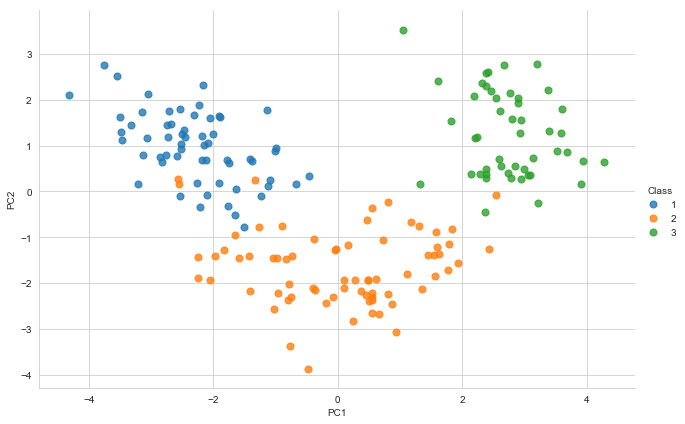

In [20]:
sns.lmplot(data = df[['PC1','PC2','Class']], x = 'PC1', y = 'PC2',fit_reg=False, hue = 'Class',\
                 height = 6, aspect=1.5, scatter_kws = {'s':50}, )